Using Colab cache for faster access to the 'sleep-health-and-lifestyle-dataset' dataset.
✅ Dataset downloaded at: /kaggle/input/sleep-health-and-lifestyle-dataset

🔹 First 5 rows of the dataset:
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4              

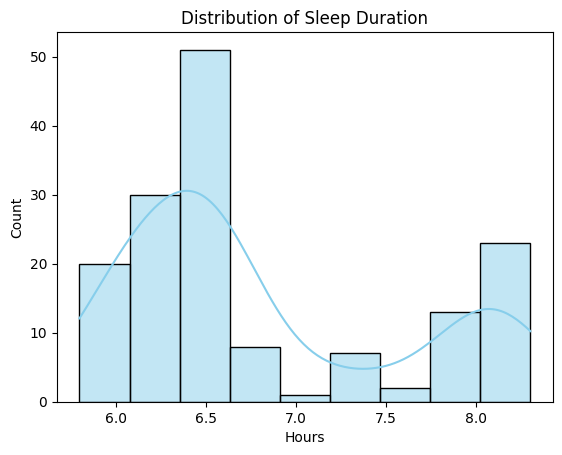

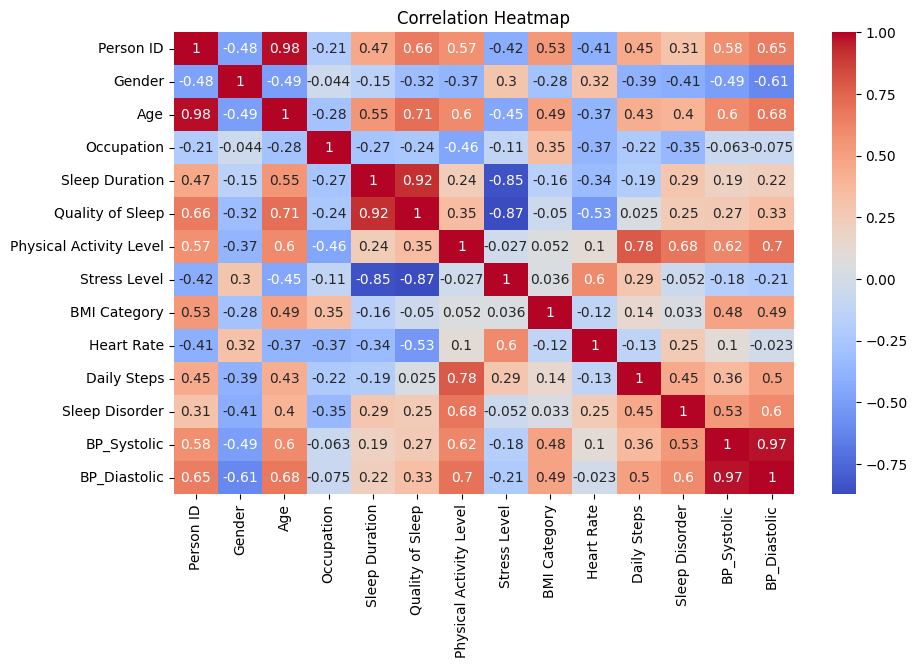


✅ Training set size: (124, 13)
✅ Testing set size: (31, 13)

🎯 Model Evaluation:
Accuracy: 0.8064516129032258

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.82      0.82      0.82        17

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31



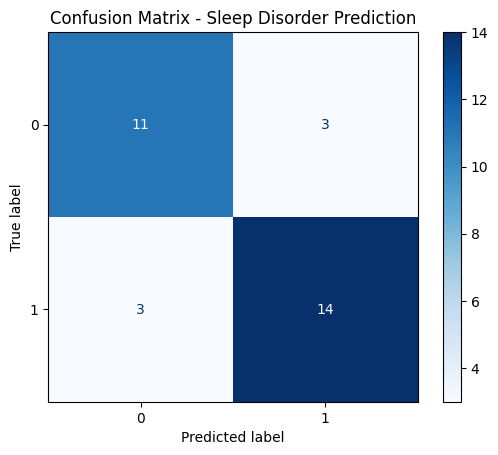

/tmp/ipython-input-2379419207.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette="viridis")


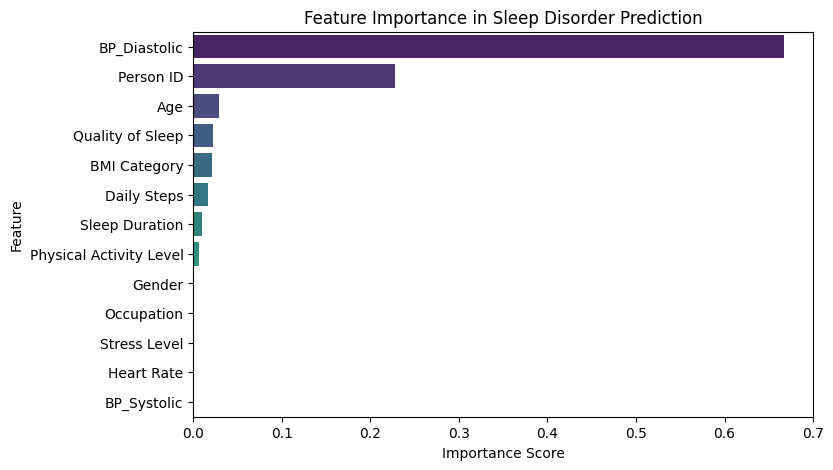


📘 PROJECT SUMMARY
• Dataset: Sleep Health and Lifestyle (Kaggle)
• Model Used: Decision Tree Classifier
• Task Type: Classification
• Evaluation Metrics: Accuracy, Precision, Recall, F1 Score
• Visualizations: Distribution, Correlation, Confusion Matrix, Feature Importance


In [ ]:

#Sleep Disorder Prediction using Machine Learning

# required libraries
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)


# Download and Load the Dataset
path = kagglehub.dataset_download("uom190346a/sleep-health-and-lifestyle-dataset")
print("✅ Dataset downloaded at:", path)

file_path = os.path.join(path, "Sleep_health_and_lifestyle_dataset.csv")
df = pd.read_csv(file_path)
print("\n🔹 First 5 rows of the dataset:")
print(df.head())


# Clean and Prepare the Data


# Handle 'Blood Pressure' column (split into two numeric columns)
df[['BP_Systolic', 'BP_Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
df['BP_Systolic'] = pd.to_numeric(df['BP_Systolic'], errors='coerce')
df['BP_Diastolic'] = pd.to_numeric(df['BP_Diastolic'], errors='coerce')
df = df.drop('Blood Pressure', axis=1)

# Check missing values
print("\n🔹 Missing values per column:")
print(df.isnull().sum())

# Drop or fill missing values (optional: drop rows with NaN)
df = df.dropna()

# Encode categorical columns
label = LabelEncoder()
df['Gender'] = label.fit_transform(df['Gender'])
df['Occupation'] = label.fit_transform(df['Occupation'])
df['BMI Category'] = label.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = label.fit_transform(df['Sleep Disorder'].astype(str))

# Statistical Analysis
print("\n📊 Statistical Summary:")
print(df.describe())

# Mean, Median, and Standard Deviation examples
print("\n🔹 Mean Sleep Duration:", df['Sleep Duration'].mean())
print("🔹 Median Sleep Duration:", df['Sleep Duration'].median())
print("🔹 Std of Stress Level:", df['Stress Level'].std())

# Distribution plot for Sleep Duration
sns.histplot(df['Sleep Duration'], kde=True, color='skyblue')
plt.title("Distribution of Sleep Duration")
plt.xlabel("Hours")
plt.ylabel("Count")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# Split Dataset for Training and Testing

X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\n✅ Training set size:", X_train.shape)
print("✅ Testing set size:", X_test.shape)


# Train the Machine Learning Model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


# Evaluate Model Performance
y_pred = model.predict(X_test)

# Accuracy & Classification Report
print("\n🎯 Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Sleep Disorder Prediction")
plt.show()

# Feature Importance (Bonus Insight)
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=importances.index, palette="viridis")
plt.title("Feature Importance in Sleep Disorder Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


#Project Summary
print("\n📘 PROJECT SUMMARY")
print("• Dataset: Sleep Health and Lifestyle (Kaggle)")
print("• Model Used: Decision Tree Classifier")
print("• Task Type: Classification")
print("• Evaluation Metrics: Accuracy, Precision, Recall, F1 Score")
print("• Visualizations: Distribution, Correlation, Confusion Matrix, Feature Importance")
